In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['emnist-mnist-mapping.txt', 'emnist-digits-train.csv', 'emnist-letters-mapping.txt', 'emnist-balanced-mapping.txt', 'emnist-mnist-train.csv', 'emnist-letters-train.csv', 'emnist-bymerge-train.csv', 'emnist-bymerge-test.csv', 'emnist_source_files', 'emnist-balanced-train.csv', 'emnist-mnist-test.csv', 'emnist-bymerge-mapping.txt', 'emnist-digits-mapping.txt', 'emnist-byclass-mapping.txt', 'emnist-letters-test.csv', 'emnist-digits-test.csv', 'emnist-byclass-test.csv', 'emnist-byclass-train.csv', 'emnist-balanced-test.csv']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

In [3]:
data_train = pd.read_csv("../input/emnist-bymerge-train.csv", header=None)
data_test = pd.read_csv("../input/emnist-bymerge-test.csv", header=None)

# Data Exploration

In [4]:
print(data_train.shape)
print(data_test.shape)

(697932, 785)
(116323, 785)


In [5]:
print(data_train.head())

   0    1    2    3    4    5    6   ...   778  779  780  781  782  783  784
0   24    0    0    0    0    0    0 ...     0    0    0    0    0    0    0
1   36    0    0    0    0    0    0 ...     0    0    0    0    0    0    0
2    5    0    0    0    0    0    0 ...     0    0    0    0    0    0    0
3    6    0    0    0    0    0    0 ...     0    0    0    0    0    0    0
4   35    0    0    0    0    0    0 ...     0    0    0    0    0    0    0

[5 rows x 785 columns]


In [4]:
x_train = data_train.loc[:,1:].as_matrix()
y_train = np.array(data_train[0])
x_test = data_test.loc[:,1:].as_matrix()
y_test = np.array(data_test[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(697932, 784)
(697932,)
(116323, 784)
(116323,)


In [5]:
import gc
del [[data_train, data_test]]
gc.collect()

18

In [9]:
print('max = ', y_train.max(),"\t"," min = ", y_train.min())

max =  46 	  min =  0


# Exploratory Visualization

In [6]:
mapping = np.loadtxt('../input/emnist-bymerge-mapping.txt',dtype=int, usecols=(1), unpack=True)
print(mapping)

[ 48  49  50  51  52  53  54  55  56  57  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  97  98 100 101 102 103 104 110 113 114 116]


In [7]:
char_labels={}
for i in range(y_train.min(),y_train.max()+1):
    char_labels[i] = chr(mapping[i])
print(char_labels)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


## Visualize Random 20 Training Images

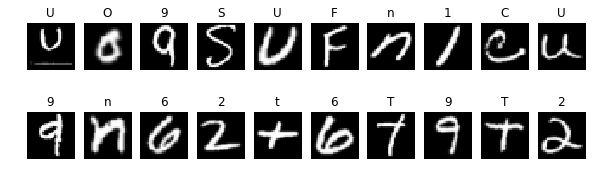

In [12]:
random_array = np.random.randint(x_train.shape[0], size=(2,10))
plt.figure(figsize=[10,3])
for i in range(10):
    plt.subplot(2,10,i+1)
    a = int(y_train[random_array[0,i]])
    plt.title(char_labels[a])
    plt.imshow(x_train[random_array[0,i]].reshape(28,28).squeeze().T, cmap='gray')
    plt.axis('off')
    plt.subplot(2,10,i+11)
    b = int(y_train[random_array[1,i]])
    plt.title(char_labels[b])
    plt.imshow(x_train[random_array[1,i]].reshape(28,28).squeeze().T, cmap='gray')
    plt.axis('off')

## View an Image in More Detail

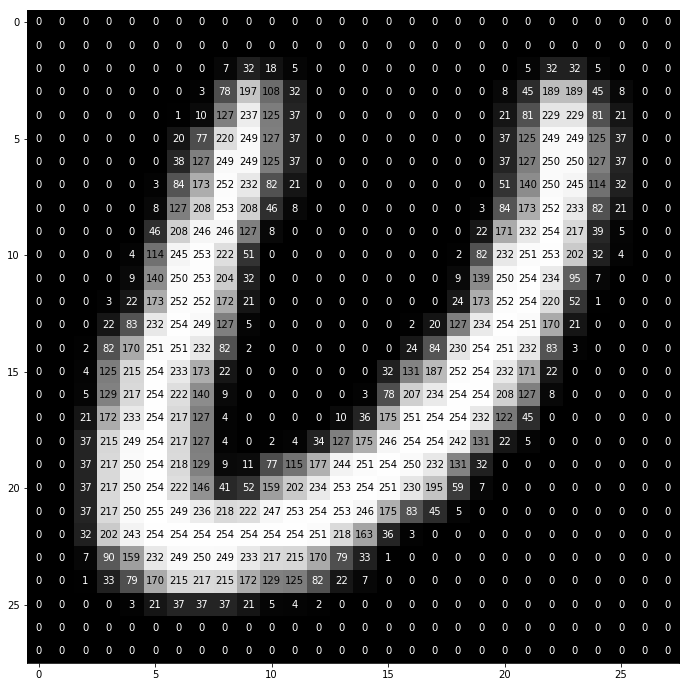

In [13]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
sample_img = x_train[random_array[0,4]]
visualize_input(sample_img.reshape(28,28).squeeze().T, ax)

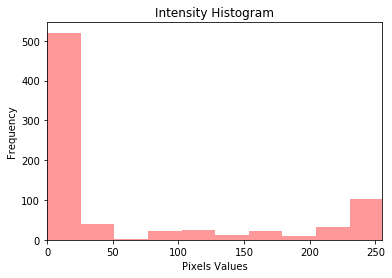

In [14]:
plt.xlim((0,255))
plt.hist(sample_img, range=(0,256), color='red', alpha=0.4)
plt.xlabel('Pixels Values')
plt.ylabel('Frequency')
plt.title('Intensity Histogram')
plt.show()

# Data Preprocessing
## Rescale the Images by Dividing Every Pixel in Every Image by 255

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## Normalize Images

In [9]:
from sklearn.preprocessing import normalize
x_train = normalize(x_train)
x_test = normalize(x_test)

## Encode Categorical Integer Labels Using a One-Hot Scheme

In [10]:
from keras.utils import np_utils

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, num_classes=47)
y_test = np_utils.to_categorical(y_test, num_classes=47)

Using TensorFlow backend.


In [13]:
y_train.shape

(697932, 47)

In [14]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

## Reshape images data from row to 32 X 32

In [11]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [11]:
print(x_train[0].shape)
x_train[0]

(28, 28, 1)


array([[[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [

# CNN Model

## Define the Model Architecture

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

# define the model
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=2))
#cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu',))
cnn_model.add(MaxPooling2D(pool_size=2))
#cnn_model.add(BatchNormalization())
#cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(BatchNormalization())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(47, activation='softmax'))

# summarize the model
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
__________

## Compile the Model

In [13]:
# compile the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

## Train the Model

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# train the model
checkpointer = ModelCheckpoint(filepath='EMNIST_CNN.cnn_model.best.hdf5',
                               verbose=1, save_best_only=True)
earlystopper = EarlyStopping(patience=3, verbose=1)
hist = cnn_model.fit(x_train, y_train, batch_size=128, epochs=3, 
                     validation_split=0.2, callbacks=[checkpointer, earlystopper], verbose=1, shuffle=True)

Train on 558345 samples, validate on 139587 samples
Epoch 1/3
558345/558345 [==============================] - 954s 2ms/step - loss: 0.5418 - acc: 0.8234 - val_loss: 0.3508 - val_acc: 0.8758ss: 0.

Epoch 00001: val_loss improved from inf to 0.35079, saving model to EMNIST_CNN.cnn_model.best.hdf5
Epoch 2/3
558345/558345 [==============================] - 945s 2ms/step - loss: 0.3877 - acc: 0.8670 - val_loss: 0.3053 - val_acc: 0.8902

Epoch 00002: val_loss improved from 0.35079 to 0.30527, saving model to EMNIST_CNN.cnn_model.best.hdf5
Epoch 3/3
558345/558345 [==============================] - 948s 2ms/step - loss: 0.3630 - acc: 0.8743 - val_loss: 0.3118 - val_acc: 0.8873

Epoch 00003: val_loss did not improve from 0.30527


In [16]:
# load the weights that yielded the best validation accuracy
cnn_model.load_weights('EMNIST_CNN.cnn_model.best.hdf5')

In [18]:
# evaluate test accuracy
score = cnn_model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 88.9558%
